[Jupyter Notebook](https://lancejnelson.github.io/PH135/jupyter/sympy.ipynb)

# The `sympy` module
`Sympy` (pronounced "sim-pie") is short for symbolic python and can be used to do symbolic math calculations. You may be familiar with other symbolic math packages like Mathematica or Maple.  Python's sympy package will do all of the same things that they will do and it's nice to not have to switch between two different coding languages.


## Simple Calculations
You should be very comfortable performing simple calculations by now.  Up to this point all of the calculations that you have performed have been represented **approximately**, rather than exactly.  For example, $\cos({\pi \over 6}) = {\sqrt{3} \over 2} \text{ (exact)} \approx 0.8660254 \text{ (approximate)}$ and when you perform this calculation in Python using the `math` module, the result is approximate:


In [1]:
from math import cos,pi

cos(pi/6)

0.8660254037844387

$0.8660254$ is an approximate result; it's very close to the true value but not exact. Sympy can also perform this calculation and the results are represented exactly.

In [2]:
from sympy import cos,pi,init_printing
init_printing(use_unicode = True)

import sympy as sp
import math as mt

print(sp.cos(sp.pi/6))
mt.cos(mt.pi/6)

sqrt(3)/2


C:\Users\bryce\anaconda32\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
C:\Users\bryce\anaconda32\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
C:\Users\bryce\anaconda32\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
C:\Users\bryce\anaconda32\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The Mathte

The `init_printing(use_unicode=True)` function call tells sympy to display mathematical expressions using "pretty" formatting.  Fraction appear with the numerator on top of the denominator,  powers are displayed as superscripts, and other mathematical symbols are rendered to make the mathematical expression look right. Sympy can even simplify expressions.  For example, $\sqrt{8} = 2 \sqrt{2}$ and sympy automatically performs this simplification for us:

In [3]:
from sympy import sqrt

sqrt(8)

If you prefer to have your expression approximated numerically, you can use the `N` function.


In [3]:
from sympy import sqrt,N

N(sqrt(8))

## Forming Mathematical Expressions

### Defining Symbols (Mathematical Variables)
A common equation that comes up in physics is quadratic function with constant coefficients $$ax^2 + bx + c$$. To form this expression, we must first define the variables that appear in the expression: `x`, `a`, `b`, and `c`. The `Symbol` function (case sensitive) can be used to define these **mathematical** variables. The argument to the `Symbol` function should be a string containing the desired name of the variable. 

In [7]:
from sympy import Symbol
x = Symbol("x")
a = Symbol("a")
b = Symbol("b")
c = Symbol("c")
x,a,b,c

Instead of using the `Symbol` function to initialize variables one at a time, you can initialize multiple variables in one line using the `symbols` function.  The argument to the `symbols` function should be a string with the names of each variables inside the string and separated by a space. 

In [8]:
from sympy import symbols

x,a,b,c = symbols("x a b c")
x,a,b,c

### Mathematical Expressions

A mathematical expression, which is composed of multiple mathematical variables (symbols), can now be created using the python variables that we just created

In [9]:
from sympy import Symbol
x,a,b,c = symbols("x a b c")
expression = a * x**2 + b * x + c
expression

Expressions can be used to form new expressions by performing mathematical operations on them

In [10]:
from sympy import symbols

x,a,b,c = symbols("x a b c")
expression = a * x**2 + b * x + c

newexpression = x * expression
newexpression

## Simplifying Expressions
`sympy` has several handy functions that can perform algebraic manipulations to your expressions.

### The `simplify` function
If you don't know exactly how you want your expression simplified, you should first try the `simplify` function.  `simplify` attempts to apply all of the more specialized functions in a smart way to produce a simpler looking result.  To use `simplify` simply send the desired expression in as an argument.

```
simplify(expression)
```

In [6]:
from sympy import symbols,cos,sin,simplify
x,y,z = symbols("x y z")
simplify(x**2 * z + 4 * x *y*z + 4*y**2*z)
simplify(cos(x)**2 + sin(x)**2)

When `simplify` doesn't do what you were hoping, you'll have to think a little bit harder about how you want to simplify your expression. The functions described in the rest of this section will help you in your choice.

### The `expand` function
The expand function will put a polynomial function into its canonical monomial form. For example, expanding the following polynomial $$(x + 1)^2$$
will produce the standard form of the polynomial $$x^2 + 2x + 1$$.  This may not seem like a simplification but nevertheless it can be helpful at times.  To expand a polynomial, call the `expand` function and send in the expression that you want expanded.

```
expand(expression)
```

In [15]:
from sympy import symbols,expand
x = symbols("x")
expand((x + 2) * (x - 3))
expand((x+3)**4)

Sometimes expanding an expression can result in a single number due to cancellation. 


In [ ]:
from sympy import Symbol,expand
x = Symbol("x")
expand((x + 1)*(x - 2) - (x - 1)*x)

### The `factor` function

The `factor` function does the opposite of `expand`, taking a canonical polynomial and attempting to factor it into its irreducible parts.  For example, factoring the equation below $$x^3 - x^2 + x -1$$ will produce $$(x-1)(x^2 + 1)$$


In [16]:
from sympy import symbols,factor
x,y,z = symbols("x y z")
factor(x**2 * z + 4 * x *y*z + 4*y**2*z)

You can also factor an expression that isn't a polynomial.  The following trigonometric function can be factored $$\cos(x)^2 + 2 \cos(x)\sin(x) + \sin(x)^2$$ into $$(\sin(x) + \cos(x))^2$$

In [ ]:
from sympy import symbols,factor,cos,sin
x,y,z = symbols("x y z")
factor(cos(x)**2 + 2 * cos(x) * sin(x) + sin(x)**2)

### The `collect` function
The `collect` function gathers terms with common powers in an expression. The function takes two arguments: the first is the expression and the second specifies which variable's powers should be collected.

```
collect(expression, variable)
```

In [17]:
from sympy import symbols,collect
x,y,z = symbols("x y z")
collect(x*y + x - 3 + 2 * x**2 - z *x**2 + x**3,x)

### The `cancel` function

The `cancel` function is helpful for simplifying an expression by canceling out like terms where possible.  This function takes just a single argument, which is the expression to be simplified. The code below will simplify the following expression by canceling the common `(x+1)` that appears in both the numerator and denominator. $${x^2 + 2 x + 1 \over x^2 + x}$$


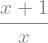

In [18]:
from sympy import symbols,cancel
x,y,z = symbols("x y z")
cancel((x**2 + 2*x + 1)/(x**2 + x))

### The `trigsimp` function

If you want to use trigonometric identities to simplify your expression use the `trigsimp` function. For example, most of us know that $\cos(x)^2 + \sin(x)^2 = 1$.  `trigsimp` will perform this simplification for us.  


In [7]:
from sympy import symbols,trigsimp,cos,sin
x = symbols("x")
trigsimp(cos(x)**2 + sin(x)**2)

### The `expand_trig` function

`expand_trig` is the opposite of `trigsimp` and usually makes trig functions longer, but that can still be a useful way to view the function.  Below we expand the expression $$\sin(x + y)$$ using a trig identity. 


In [8]:
from sympy import symbols,expand_trig
x,y = symbols("x y")
expand_trig(sin(x + y))

## Calculus
`sympy` can do common calculus operations on symbolic expressions.  We'll cover: derivatives, integrals, and limits.

### Derivatives

To calculate the derivative of an expression, use the `diff` function, which takes two arguments.  The first is the expression that you want to take the derivative of and the second is the differentiating variable.  In the cell below we calculate the derivative $${d\over dx} \cos(x)$$


In [9]:
from sympy import symbols,diff,cos
x = symbols("x")
diff(cos(x),x)

To take multiple derivatives, simply add more `x`s to the `diff` function call.  Below we calculate the derivative $${d^2\over dx^2} \cos(x)$$ 


In [10]:
from sympy import symbols,diff,cos
x = symbols("x")
diff(cos(x),x,x)

`diff` can perform partial derivatives too. Below we perform the following partial derivatives $${\partial^2 \over \partial z^2} {\partial \over \partial y} {\partial \over \partial x} \exp(x y z)$$


In [11]:
from sympy import symbols,diff,exp
x,y,z = symbols("x y z")
diff(exp(x * y * z),x,y,z,z)

### Integrals

Use the `integrate` function to perform definite and indefinite integrals.   For definite integral, the function should be called with two arguments; the first is the expression to be integrated and the second is the tuple containing the integration limits.  Below we integrate $$ \int_0^5 \exp(-x) dx$$


In [12]:
from sympy import integrate, Symbol

x = Symbol("x")

integrate(exp(-x),(x,0,5))

The limits of your integral can be at infinity by importing `oo` and using it in the limit specification.


In [13]:
from sympy import integrate, Symbol,oo

x = Symbol("x")

integrate(exp(-x),(x,0,oo))

Multiple integrations can be carried out by adding more arguments to the `integrate` function, each one specifying the limits for that variable.  Here we integrate $$\int_0^\infty \int_0^\infty \exp(-x^2 -y^2) dx dy $$


In [ ]:
from sympy import integrate, symbols,oo

x,y = symbols("x y")

integrate(exp(-x**2 - y**2),(x,0,oo),(y,0,oo))

Indefinite integrals can be performed by omitting the limit specification and just indicating the variable to be integrated over.  Below we perform the following indefinite integral $$\int \int x^2 + y^2 dx dy $$ 


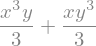

In [22]:
from sympy import integrate, symbols

x,y = symbols("x y")

integrate(x**2 + y**2,x,y)

### Limits
`sympy` can compute limits symbolically with the `limit` function. The function takes three arguments: the expression, the variable of interest, and the limiting value for that variable.  Below we take the following limit $$\lim_{x \to 0} {\sin(x)\over x}$$


In [ ]:
from sympy import limit, Symbol,sin

x = Symbol("x")

limit(sin(x)/x,x,0)

## Solving equations

So far we have seen how to construct expressions but not solve equations.  The difference is that an equation is expressing some sort of equality between an multiple expressions.  For example, the following is an equation $$5 x^2 + 3 x - 2 = 10$$  To form an equation, you can use the `Eq` function.  To use it, send in the expression on the left hand side of the equation for the first argument and the expression on the right hand side of the equation for the second argument.

```
Eq(lhs,rhs)
```

Below we form the equation $$5 x + 2y = 8$$

In [ ]:
from sympy import symbols,Eq

x,y = symbols("x y")

equation = Eq(5 * x + 2 * y , 8)
equation

### Solving single equations
Once an equation is created, the `solveset` function attempts to solve the function for the desired variables. To use `solveset`, pass the equation as the first argument and the variable being solved for as the second.  Here we solve the equation $$3 x^2 - 5 x =8$$ for $x$


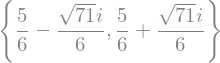

In [31]:
from sympy import symbols,Eq,solveset

x = symbols("x")

equation = Eq(3* x**2 - 5 * x, -8)
solveset(equation,x)

#### No analytic solution
In some instances, `sympy` will not be able to find any solutions to the equation.  For example, the solution to $${\sin(x)\over x} = 1$$ cannot be determined through analytical technique even though there are values of x that solve the equation.  For situations like this, `sympy` will output an expression that is meant to indicate that it can't find a solution.


In [32]:
from sympy import symbols,Eq,solveset,sin

x = symbols("x")

equation = Eq(sin(x)/x, 1)
solveset(equation,x)

#### No solution... period
Some equations really don't have solutions and  `sympy` can correctly identify these cases.  For example, the equation $$\exp(x) = 0$$  has no solutions.  Let's see what `sympy` tells us when we try to solve this one.


In [14]:
from sympy import symbols,Eq,solveset,exp

x = symbols("x")

equation = Eq(exp(x), 0)
solveset(equation,x)

The $\emptyset$ symbol means an empty set or there are no solutions to this equation. 

#### Many or Infinite Solutions
Some equations have infinitely many solutions.  For example the following equation $$x - x = 0$$ is satisfied for any complex or real value of $x$.  Let's see what sympy does when we ask it to solve this one.


In [15]:
from sympy import symbols,Eq,solveset

x = symbols("x")

equation = Eq(x-x, 0)
solveset(equation,x)

The output ($\mathbb{C}$) is communicating that the set of all complex numbers are the solution to this equation. (Meaning you can choose any number and it will be a solution to this equation.) 


### Solving Systems of equations
Often you will have multiple equations with multiple unknown variables that you want to solve for.  They call this a system of equations.  An example would be the following system $$3 x - 5 y = 8$$ $$8x + 2y = 3$$.  The normal process for solving this system is to solve one equation for $x$ and then plug the expression that results into the other equation.  That equations will only have $y$ as a variable and you can do algebra to solve for it.  

#### Linear Systems
The example given above is called a linear system because none of the variables are raised to a power.  To solve a system like this, use `sympy`'s  `linsolve` function.


In [4]:
from sympy import symbols,Eq,linsolve

x,y = symbols("x y")

equationOne = Eq(3* x - 5 * y, 8)
equationTwo = Eq(8* x + 2 * y, 3)
display(linsolve([equationOne,equationTwo],(x,y)))


{(31/46, -55/46)}

It isn't hard to find a system of equations that doesn't have a solution.  $$12 x - 3 y = 8$$ $$8x - 2y = 3$$  As with single equations, `sympy` will indicate this with the empty set symbol ($\emptyset$).


In [36]:
from sympy import symbols,Eq,linsolve

x,y = symbols("x y")

equationOne = Eq(12* x - 3 * y, 8)
equationTwo = Eq(8* x - 2 * y, 3)
linsolve([equationOne,equationTwo],(x,y))

#### Nonlinear Systems

If the equations involve variables being raised to powers, we call it a non linear system and you must use `sympy`'s `nonlinsolve` to solve the system.  For example, here is a nonlinear system $$3 x^2 + 5 y^2 = 8$$ $$8x^2 - 12y^2 = 13$$


In [3]:
from sympy import symbols,Eq,nonlinsolve,N
from numpy import array,vectorize
x,y = symbols("x y")


eqOne = Eq(3*x**2 + 5*y**2,8)
eqTwo = Eq(8*x**2 - 12*y**2,13)
solutions= nonlinsolve([eqOne,eqTwo],(x,y))
solutions

{(-sqrt(3059)/38, -5*sqrt(19)/38), (-sqrt(3059)/38, 5*sqrt(19)/38), (sqrt(3059)/38, -5*sqrt(19)/38), (sqrt(3059)/38, 5*sqrt(19)/38)}

## Flashcards
1. How do you define a mathematical variable in Python?
2. How do you form a mathematical expression in Python? (Give an example)
3. How do you form a mathematical equation in Python? (Give an example)
4. What does the simplify function do?
5. What does the factor function do?
6. How do you perform a derivative in Python?
7. How do you perform an integral in Python? (definite and indefinite)
8. How do you solve an equation in Python?
9. How do you solve a system of equations in Python?
10. How do you evaluate a definite integral at infinity ($\infty$)?
11. Recite 1 Ne 4:6


## Exercises
1. Define a `sympy` variable for $x$ and then evaluate the following expressions.
   - $\sin(x + {\pi \over 2})$
   - $\sin(x + \pi)$  
   - $\cos(x + {\pi \over 2})$
   - $\cos(x + \pi)$
   - $\sin(-x)$  
   - $\cos(-x)$
   - $\sqrt{1 - \sin(x)^2}$


In [2]:
import sympy as sp
x = sp.Symbol("x")
exp1 = sp.sin(x+sp.pi/2)
exp2 = sp.sin(x+sp.pi)
exp3 = sp.cos(x+sp.pi/2)
exp4 = sp.cos(x+sp.pi)
exp5 = sp.sin(-x)
exp6 = sp.cos(-x)
exp7 = sp.simplify(sp.sqrt(1-sp.sin(x)**2))
display(exp1 ,exp2,exp3,exp4,exp5,exp6,exp7)

cos(x)

-sin(x)

-sin(x)

-cos(x)

-sin(x)

cos(x)

sqrt(cos(x)**2)

In [3]:
x = sp.Symbol("x")

equation = sp.exp(-5*x)*sp.sin(2*x)
sp.integrate(equation,(x,0,sp.oo))

2/29

2. A projectile is thrown directly downward from the top of a tall building ($y_i = 150$ meters) and lands with a thud on the ground ($y_f = 0$) $4$ seconds later. The position equation for the projectile is $$y_f = y_i + v_i \Delta t + {1\over 2} g \Delta t^2$$  Use `sympy` to solve this equation for the initial velocity. Note $g = 9.8$ m/s$^2$   Answer: You should find the initial speed to be $\approx 18$ m/s

In [5]:
yf,yi,vi,t,g = sp.symbols("yf yi vi t g")
eq = sp.Eq(yf,yi + vi*t + 1/2 * g * t**2)
solve = sp.solveset(eq,vi)
solve.subs({yf: 0,yi:150,g : -9.8,t: 4})

{-17.9}

3. A projectile is launched from the top of a building ($y_i = 23$ m) with an initial speed of $v_i = 60$ m/s and a launch angle of $\theta_i = 32^\circ$.  The vertical position of the projectile is given by $$y_f = y_i + v_i \sin \theta_i \Delta t - {1\over 2}g \Delta t^2$$.  Determine the time it takes before the projectile impacts the ground by solving this equation for $\Delta t$.

In [12]:
import sympy as sp
import numpy as np
yf,yi,vi,t,g,θ = sp.symbols("yf yi vi t g θ")
eq = sp.Eq(yf,yi + vi*sp.sin(θ)*t - 1/2 * g * t**2)
solve = sp.solveset(eq,t)
solve.subs({yf: 0,yi:150,g : 9.8,θ: 32*np.pi/180, vi: 60})

{-3.16951869812387, 9.65832601526516}

4. An elastic collision is one where the total energy of the particles is the same before and after the collision.  The equations that define an elastic collision where one of the objects is initially at rest are $${1\over 2} m_1 (v_1)_i^2 = {1\over 2} m_1 (v_1)_f^2 +{1\over 2} m_2 (v_2)_f^2$$ $$m_1 (v_1)_i = m_1 (v_1)_f  + m_2 (v_2)_f$$.  Consider a situation where particle 1 ($m_1 = 5 \text{ kg}$) is initially moving to the right with speed $(v_1)_i = 10 \text{ m/s}$ and particle 2 is stationary ($m_2 = 2 \text{ kg}$). Solve this system of equations for$(v_1)_f$ and $(v_2)_f$. Do the results make sense?  Then do the following
   1. Make $m_2$ greater than $m_1$.  What do you expect will happen.  Verify that the results match your guess.  
   2. Make the mass of particle 2 much greater than particle 1.  What do you expect will happen?  Verify that the results match your guess.
   3. Make the mass of particle 1 much greater than particle 2.  What do you expect will happen?  Verify that the results match your guess.

In [15]:
m1,m2,v1i, v1f,v2f = sp.symbols("m1,m2,v1i,v1f,v2f")
energy = sp.Eq(1/2*m1*v1i**2, 1/2*m1*v1f**2+1/2*m2*v2f**2)
momentum = sp.Eq(m1*v1i,m1*v1f+m2*v2f)
sol = sp.nonlinsolve([energy,momentum],(v1f,v2f))
sol.subs({m1: 5, m2: 2, v1i: 10})

{(4.28571428571429, 14.2857142857143), (10, 0)}

5. Define a `sympy` variable for $x$ and then calculate the following derivatives:
   1. ${d\over dx} \ln(x)$
   2. ${d\over dx} e^{5x^2}$
   3. ${d\over dx} \cos(3 x^3)$
   4. ${d\over dx} (x^3 - 5x^2 + 10 x)$

In [1]:
import sympy as sp
x = sp.Symbol("x")
eq1 = sp.log(x)
eq2 = sp.exp(5*x**2)
eq3 = sp.cos(3*x**3)
eq4 = x**3 - 5*x**2 + 10*x

der1 = sp.diff(eq1,x)
der2 = sp.diff(eq2,x)
der3 = sp.diff(eq3,x)
der4 = sp.diff(eq4,x)
display(der1,der2,der3,der4)

1/x

10*x*exp(5*x**2)

-9*x**2*sin(3*x**3)

3*x**2 - 10*x + 10

6. Impulse is defined as the integral of the Force vs. time graph. $$I = \int F dt$$.  Calculate the impulse imparted to an object from $0< t < 10$ if the force that it experiences is given by $$F(t) = e^{-(t - 4)}$$.


In [7]:
t = sp.Symbol("t")
force = sp.exp(-(t-4))
impulse = sp.integrate(force,(t,0,10))
display(impulse,sp.N(impulse))

-exp(-6) + exp(4)

54.5956712809676

### In class

In [25]:
import pandas as pd
data = pd.read_csv("planets.csv")
data = data.rename(index={0:"Mercury",1:"Venus",2:"Earth",3:"Mars",4:"Saturn",5:"Jupiter",6:"Neptune",7:"Uranus",8:"Pluto"})
print(data.columns)
print(data.at["Neptune",' OrbitalPeriod'])
print(len(data[data[" Eccentricity"]>.04]))
data.query("` Mass` > 1*10**24 and ` Diameter` < 50000")
data.describe()

Index(['Name', ' Diameter', ' Mass', ' Inclination', ' Eccentricity',
       ' Semi_majorAxis', ' SurfaceGravity', ' OrbitalPeriod',
       ' SiderealRotation', ' Satellites'],
      dtype='object')
84.01
6


,Diameter,Mass,Inclination,Eccentricity,Semi_majorAxis,SurfaceGravity,OrbitalPeriod,SiderealRotation,Satellites
count,9.000000,9.000000e+00,9.000000,9.000000,9.000000,9.00000,9.000000,9.000000,9.000000
mean,44790.411111,2.965398e+26,3.963478,0.081207,11.897541,8.80000,60.177518,34.700928,19.555556
std,52883.085612,6.281318e+26,5.318150,0.088145,14.475788,6.90473,89.449974,80.393318,26.406018
min,2370.000000,1.300000e+22,0.000050,0.006777,0.387099,0.62000,0.241000,0.413500,0.000000
25%,6794.400000,6.419000e+23,1.305300,0.016711,1.000003,3.71000,1.000000,0.671200,1.000000
50%,12756.300000,5.974000e+24,1.850610,0.048386,5.202887,8.87000,11.860000,0.997271,5.000000
75%,51118.000000,1.024000e+26,3.394710,0.093394,19.189165,9.78000,84.010000,6.387230,27.000000
max,142984.000000,1.899000e+27,17.089001,0.250249,39.445070,24.79000,247.740662,243.018700,64.000000
